# Working with multiple time series

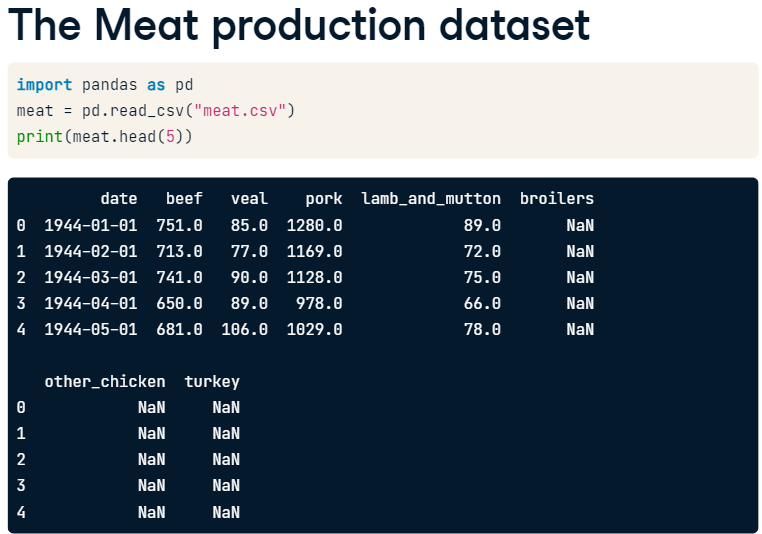
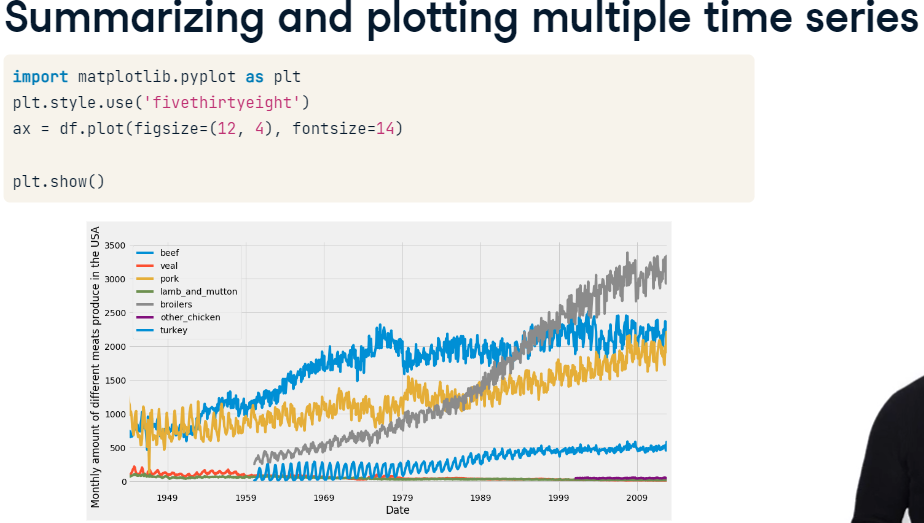
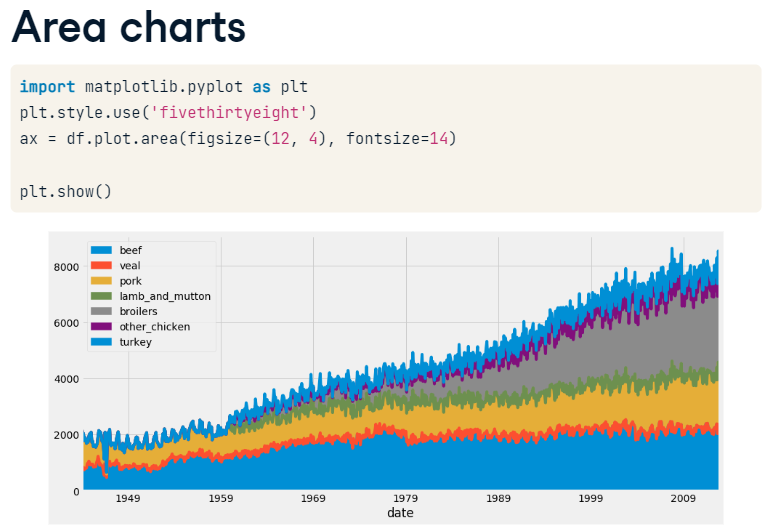


In [1]:
# 퀴즈 1-1
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())


# <Output>
# date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  turkey
#     0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN     NaN
#     1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN     NaN
#     2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN     NaN
#     3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN     NaN
#     4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN     NaN
#                beef     veal      pork  lamb_and_mutton  broilers  other_chicken   turkey
#     count   827.000  827.000   827.000          827.000   635.000        143.000  635.000
#     mean   1683.463   54.199  1211.684           38.361  1516.583         43.034  292.815
#     std     501.698   39.063   371.312           19.624   963.012          3.867  162.483
#     min     366.000    8.800   124.000           10.900   250.900         32.300   12.400
#     25%    1231.500   24.000   934.500           23.000   636.350         40.200  154.150
#     50%    1853.000   40.000  1156.000           31.000  1211.300         43.400  278.300
#     75%    2070.000   79.000  1466.000           55.000  2426.650         45.650  449.150
#     max    2512.000  215.000  2210.400          109.000  3383.800         51.100  585.100

NameError: name 'pd' is not defined

In [2]:
#퀴즈 1-2

# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

NameError: name 'meat' is not defined

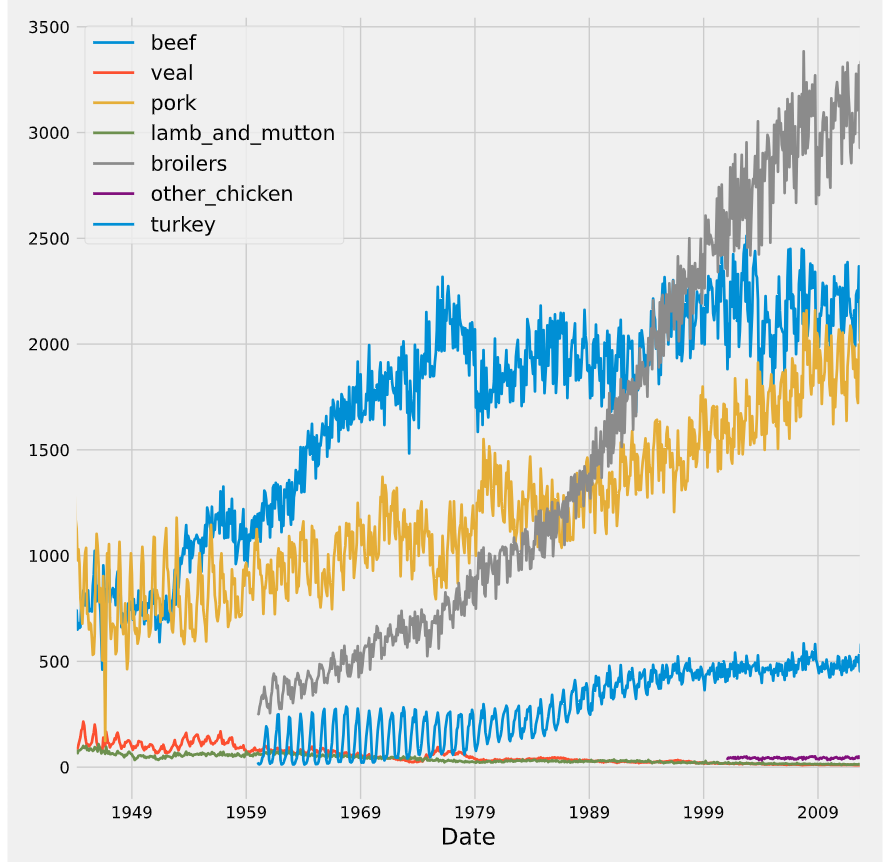

# Clarity

여러 시계열 표기 시 색깔의 차이 등 명확하지 않아 보기 어려운 점이 있음.
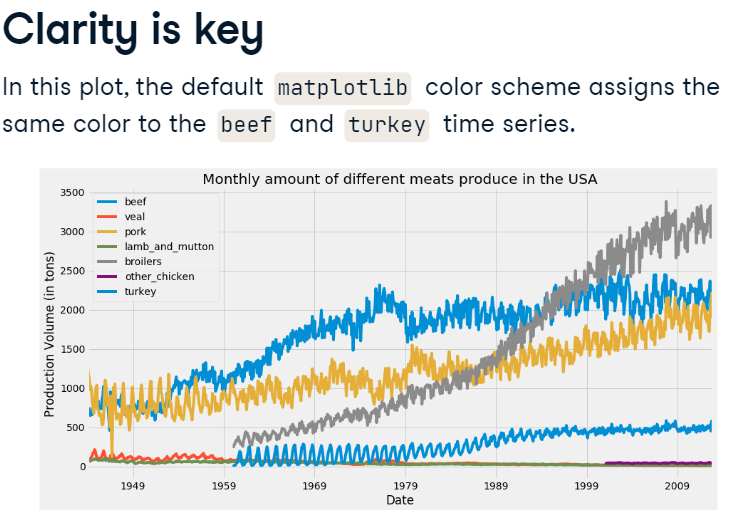
이를 해결하기 위한 colormap인수.
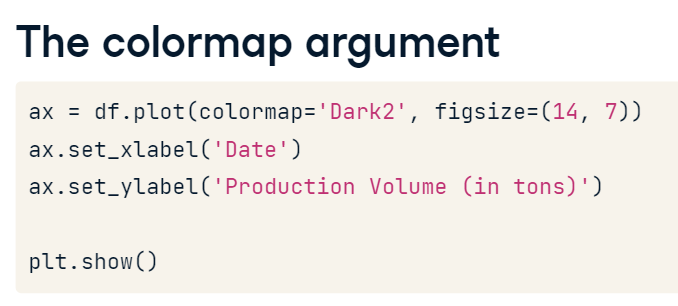
다양한 대비와 강도로 광범위한 색상 팔레트 할당 가능.
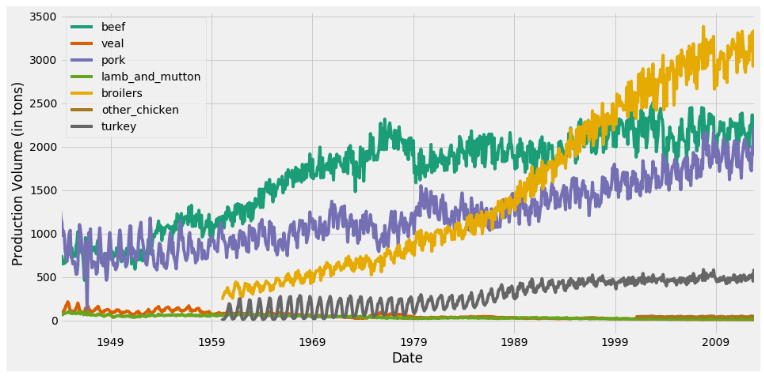
colormap을 통한 색상의 변화.


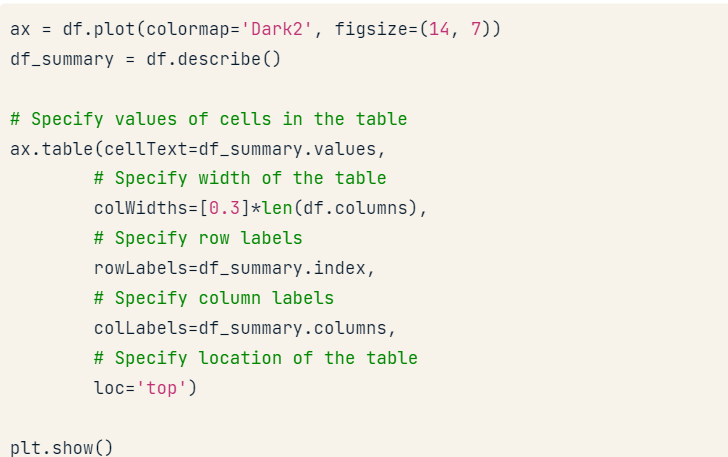
describe 메서드를 사용하고, ax.table을 사용해서 여러 테이블로 전달.
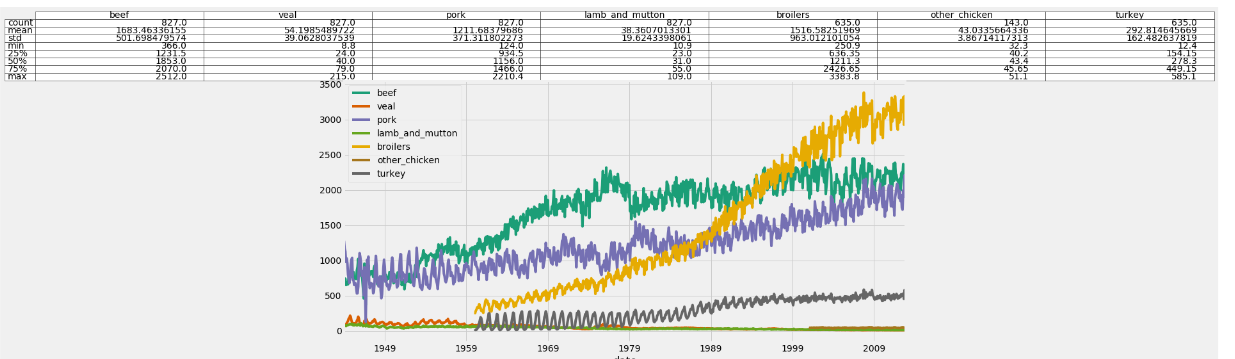


데이터의 스케일이 다를 때
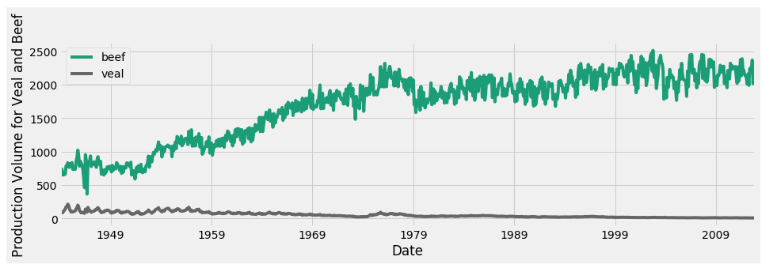
이렇게 보면 veal에 대해 패턴 구별이 어려워.
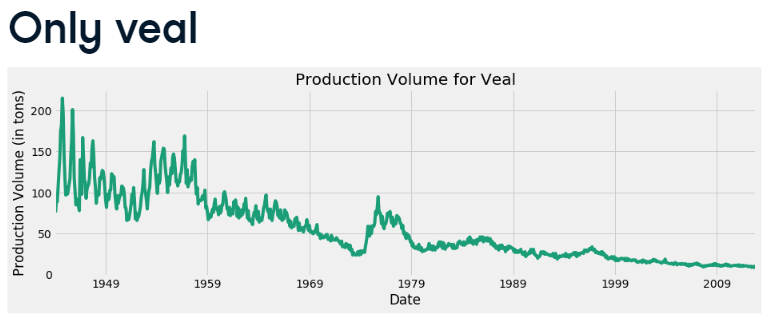
only veal만 볼 수 있지.


즉, 서로 다른 스케일의 시계열을 포함하는 데이터셋의 시각화는 다른 서브플롯에 각 컬럼을 플롯하는 서브플롯 인수를 활용.
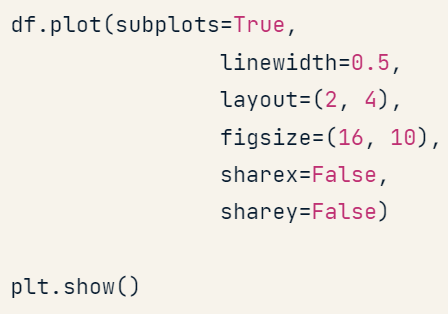
subplot = True / 와 거기서 사용할 행과 열의 수 지정 layout / 그리고 sharex sharey 인수로 서브플롯들에 대해 x축 y축 범위를 통일시킬지에 대한 체크 가능.
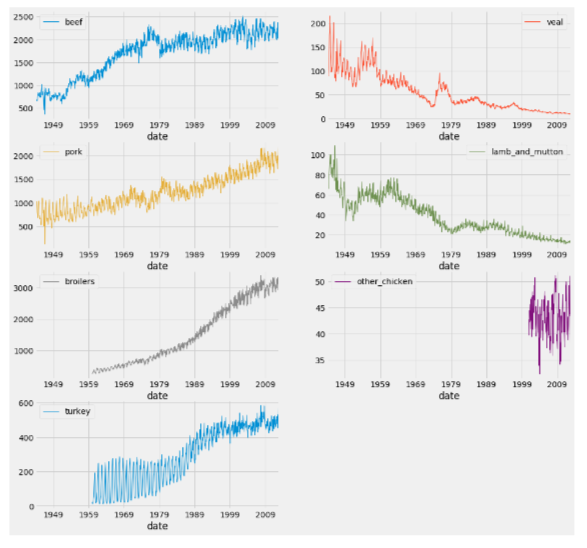
layout(2,4)면 x 축으로 2개, y축으로 4개. 행렬로 따지면 4by2.

In [3]:
# 퀴즈 2 -1 

# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()


NameError: name 'meat' is not defined

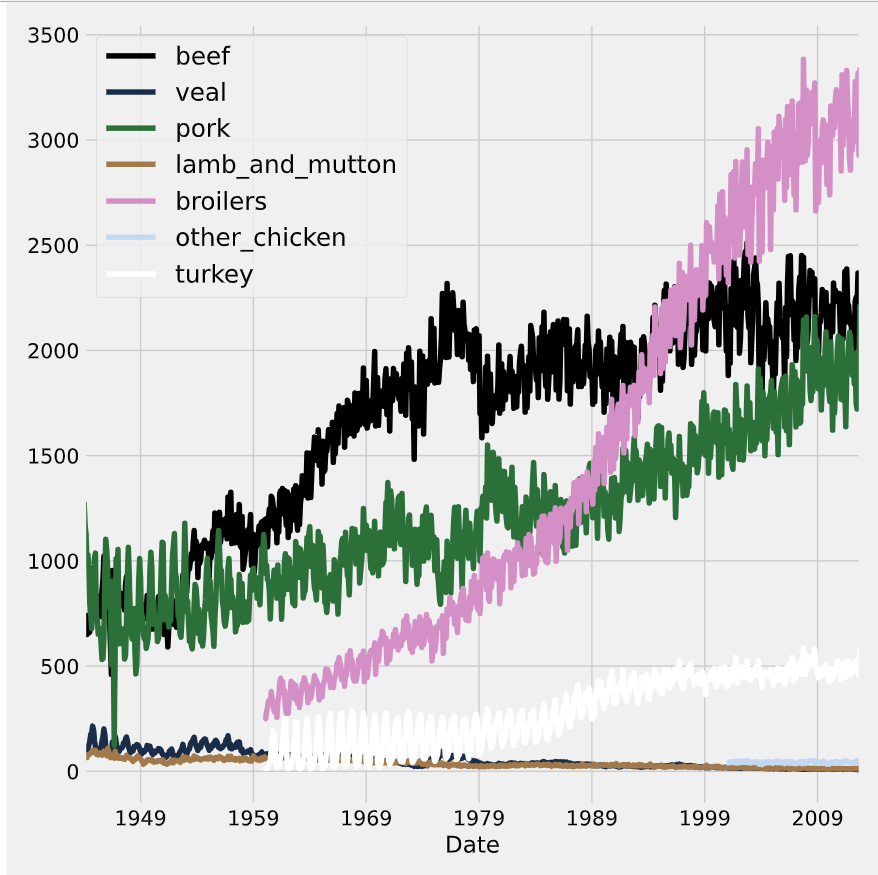

In [4]:
# 퀴즈 2-2

# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
meat_mean = meat.describe()

ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

NameError: name 'meat' is not defined

In [5]:
#퀴즈 2-2 해답

# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

NameError: name 'meat' is not defined

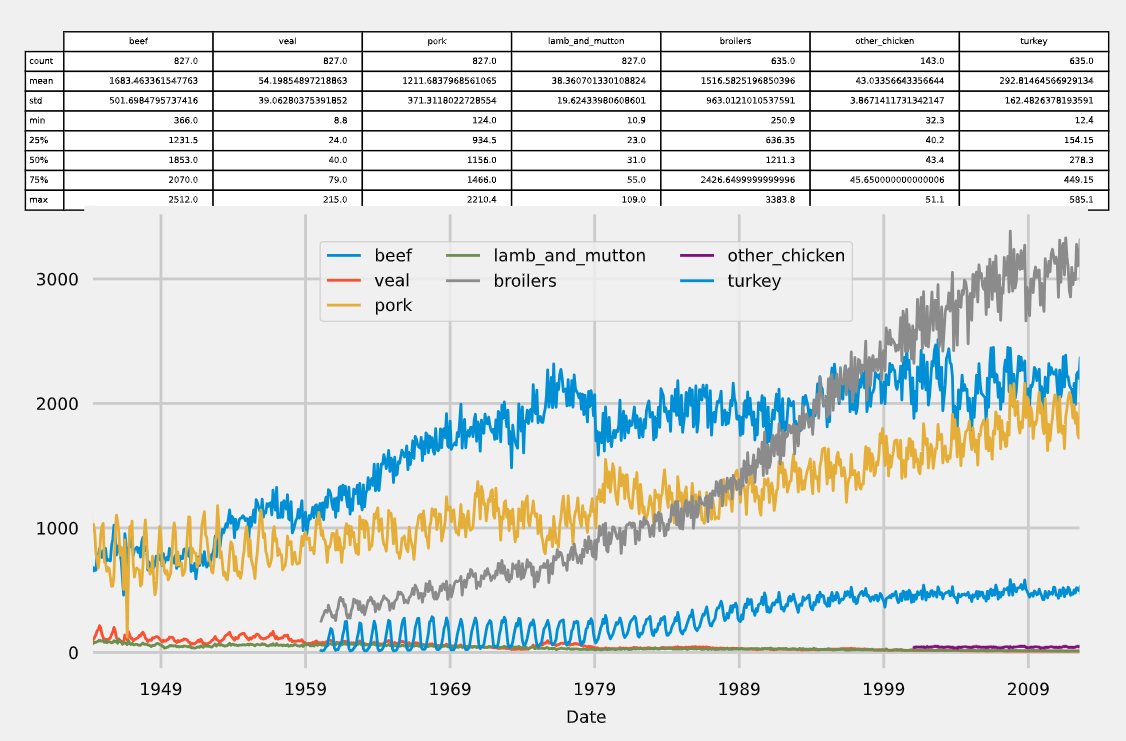

In [6]:
# 퀴즈 2-3

# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

NameError: name 'meat' is not defined

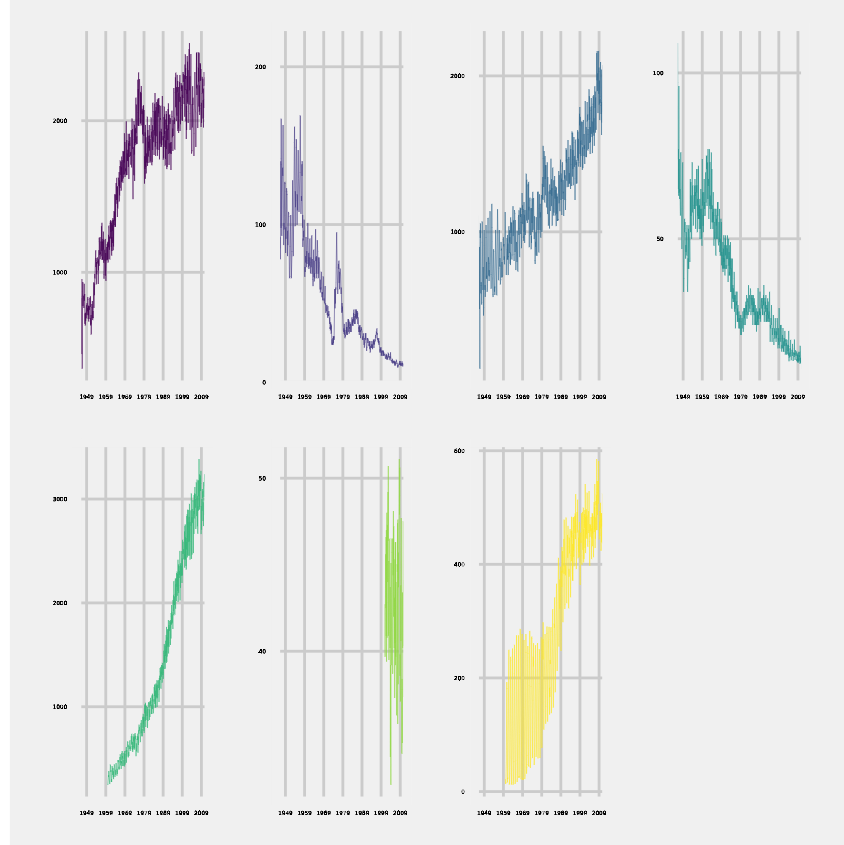

# Correlations bet 2 variables

* 변수 간 관계 선형이라 생각하면 피어슨 계수.
* 비선형이면 Kendall Tau or Spearman 순위 계수 방법
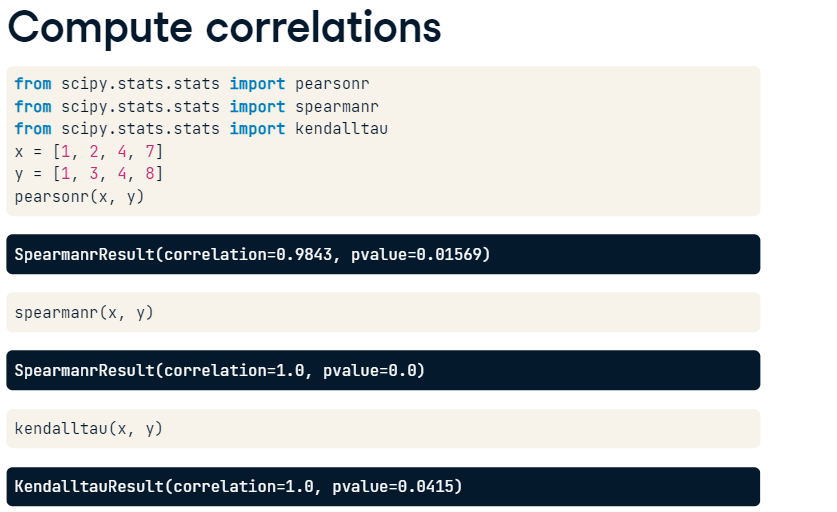
scipy.stats.stats 모듈 활용. 3가지 상관관계 측정값은 그 관계 값과 p-value를 반환.

# Correlation matrix

* 여러 항목을 조사.
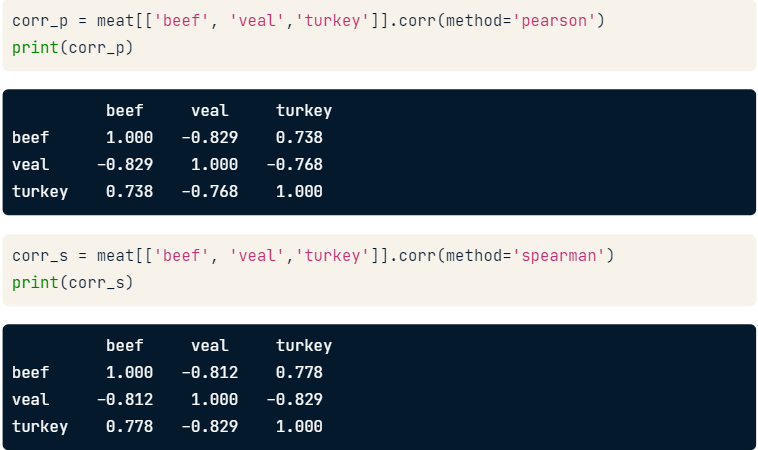

# Heatmap
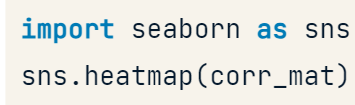
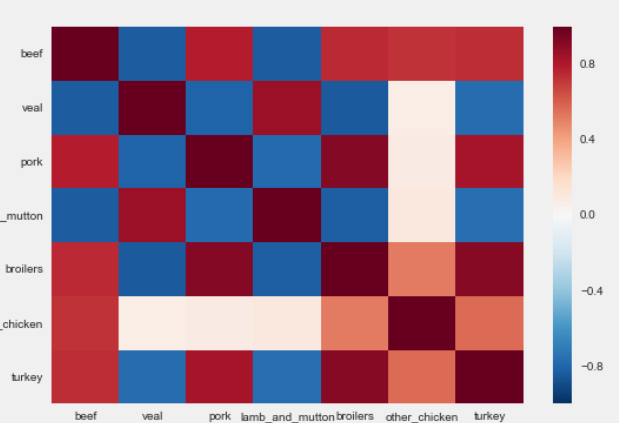
Seaborn을 활용. 상관 행렬을 시각화하는데 유용하지만, 순서가 없으면 읽기 어렵거나 유사한 시계열 그룹을 식별.(??)
이를 개선을 위한 Clustermap.

# Clustermap
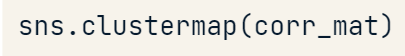
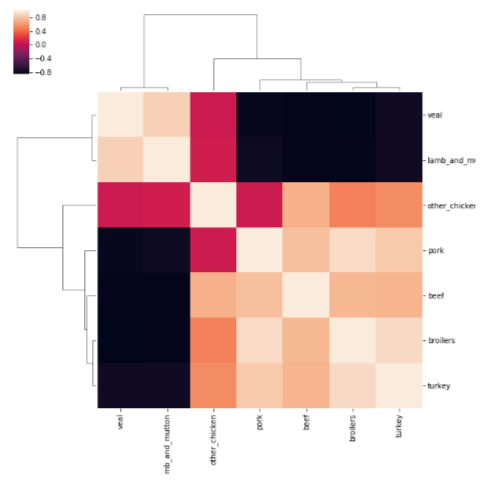
계층적 클러스터링을 적용해서 유사한 시계열이 서로 더 가깝게 배치되는 정렬된 히트맵을 표시.


In [7]:
# 퀴즈 3-1

# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)


# <output>
#        beef   pork
#     beef  1.000  0.828
#     pork  0.828  1.000
#     0.828

NameError: name 'meat' is not defined

In [8]:
# 퀴즈 3-2
# Print the correlation matrix between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835)


# <output>
#           pork   veal  turkey
#     pork    1.000 -0.809   0.835
#     veal   -0.809  1.000  -0.768
#     turkey  0.835 -0.768   1.000
#     -0.809
#     -0.768
#     0.835

NameError: name 'meat' is not defined

In [9]:
# 퀴즈 3-3

# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

NameError: name 'meat' is not defined

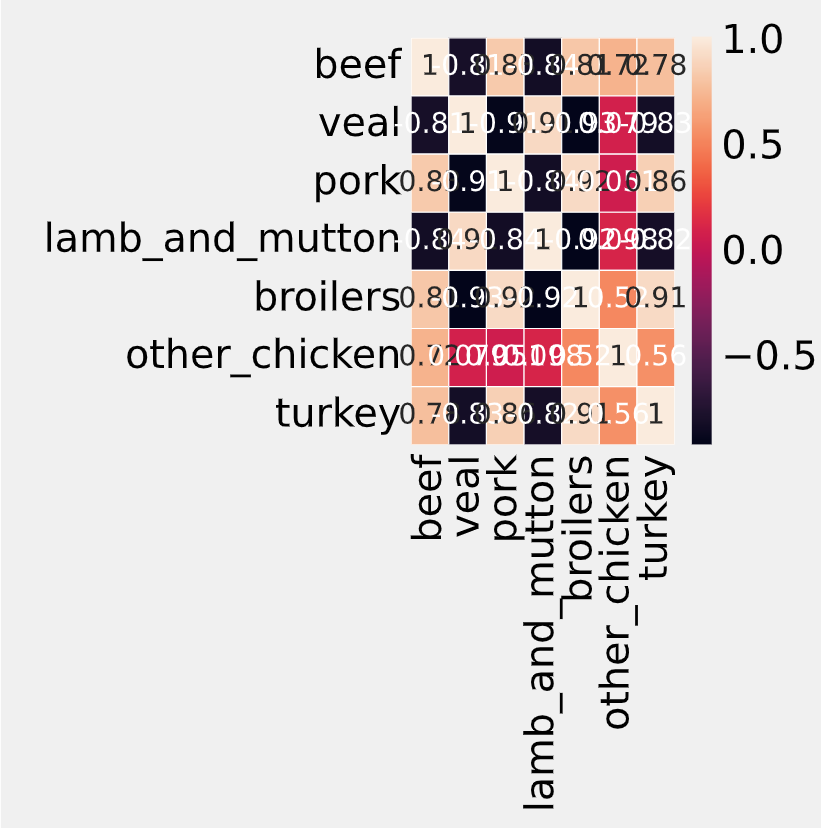

In [10]:
# 퀴즈 3-4

# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method = 'pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

NameError: name 'meat' is not defined

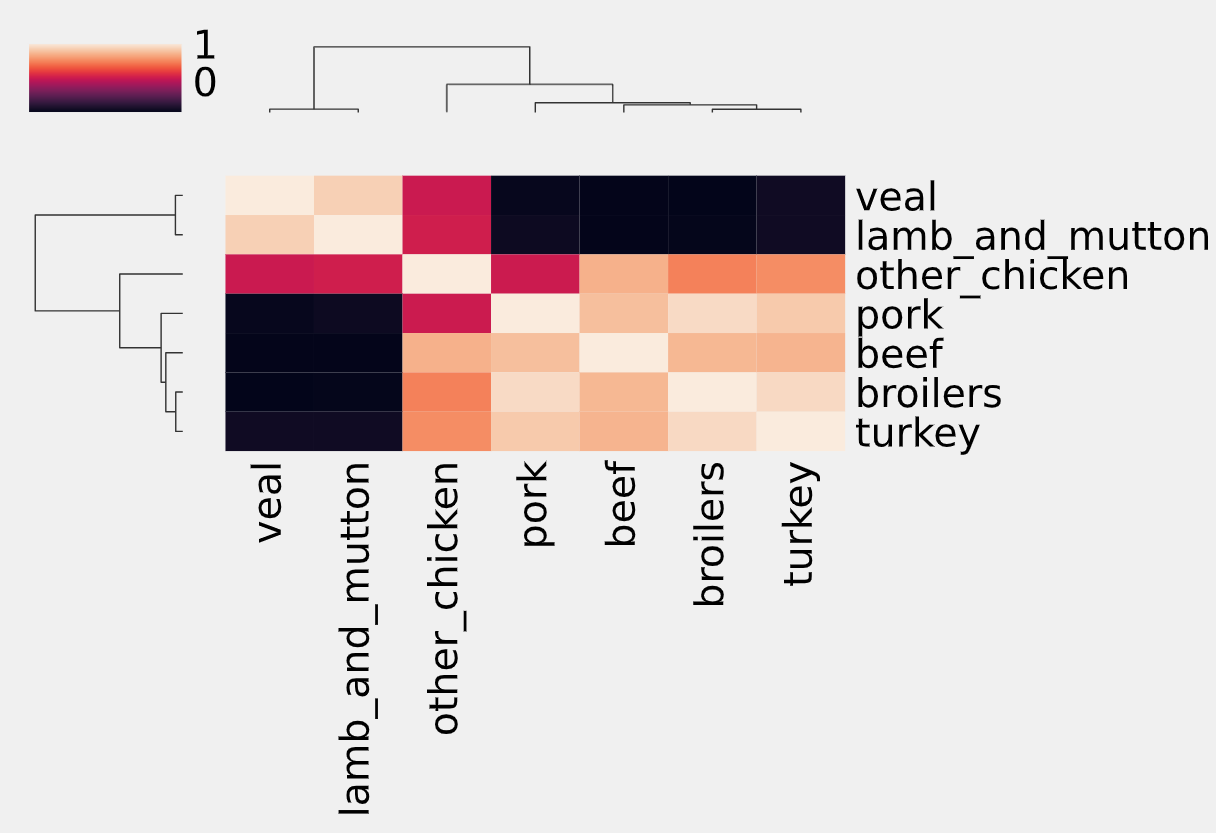